Филиппов Константин
Вариант 16

# Задание 1

In [1]:
import random

def create_random_vector(n):
    arr = [random.randint(0, 1000) for _ in range(n)]
    return arr

In [2]:
# задание 1.1

def get_by_index(arr, index):
    return arr[index]

In [3]:
# задание 1.3

def get_product(arr):
    product = 1
    for i in arr:
        product *= i
    return product

In [4]:
# задание 1.4

def get_polinome(arr, x):
    res = 0
    if len(arr) == 0:
        return 0
    if len(arr) == 1:
        return arr[0]
    for i in range(len(arr) - 1, 0, -1):
        res += arr[i]
        res *= x
    return res

In [5]:
# задание 1.5

def get_max(arr):
    res = arr[0]
    for i in range(1, len(arr)):
        if arr[i] > res:
            res = arr[i]
    return res

In [6]:
# задание 1.7

def get_average(arr):
    sum = 0
    for i in arr:
        sum += i
    return sum / len(arr)

# Замеры

In [7]:
import functools
import timeit
import typing

def get_usage_time(
    *, number: int = 1, setup: str = 'pass', ndigits: int = 3
) -> typing.Callable:
    def decorator(func: typing.Callable) -> typing.Callable:
        @functools.wraps(func)
        def wrapper(*args, **kwargs) -> float:
            usage_time = 1000 * timeit.timeit( # millisecs
                lambda: func(*args, **kwargs),
                setup=setup,
                number=number,
            )
            return round(usage_time / number, ndigits)

        return wrapper

    return decorator

In [8]:
# функция для построения графика

import matplotlib.pyplot as plt

%matplotlib inline

def create_plot(items, times, title):
    fig = plt.plot(items, times, 'bo-')
    ax = plt.gca()
    
    title = title[9:].split()[0] # обработка title
    
    plt.title(f'The execution time of the {title} algorithm')
    ax.set_xlabel('Number of elements, $n$ pieces')
    ax.set_ylabel('Time, millisec')

In [9]:
arrs = []

# условно кешируем динамические массивы, чтобы не генерировать каждый раз

for n in range(1, 10**4 * 16, 100 * 16):
    arrs.append(create_random_vector(n))

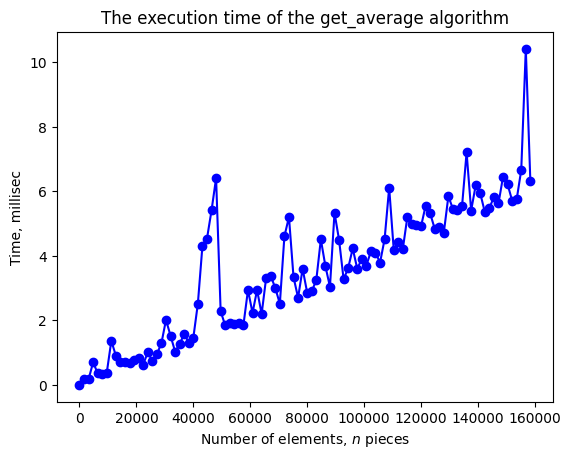

In [10]:
items = []
times = []
for arr in arrs:
    func = get_usage_time(number=10, ndigits=5)(get_average)
    items.append(len(arr))
    times.append(func(arr))
create_plot(items, times, f'{func}')

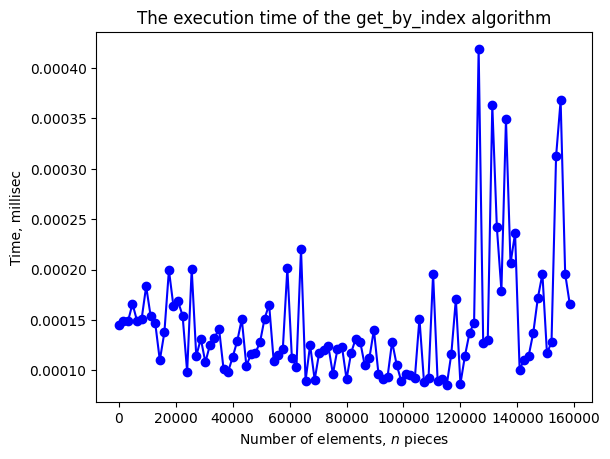

In [11]:
items = []
times = []
for arr in arrs:
    func = get_usage_time(number=1000, ndigits=20)(get_by_index)
    items.append(len(arr))
    times.append(func(arr, random.randint(0, len(arr) - 1)))
create_plot(items, times, f'{func}')

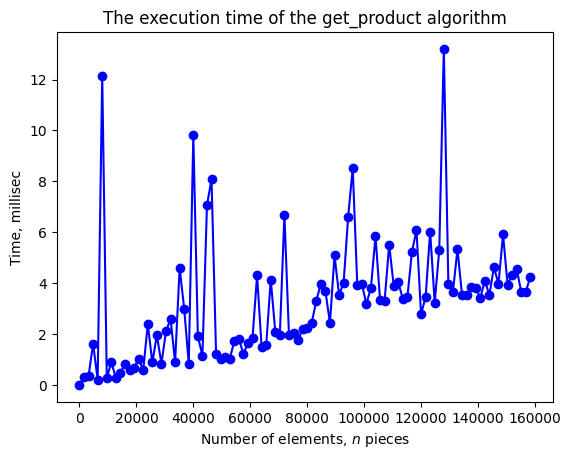

In [12]:
items = []
times = []
for arr in arrs:
    func = get_usage_time(number=25, ndigits=10)(get_product)
    items.append(len(arr))
    times.append(func(arr))
create_plot(items, times, f'{func}')

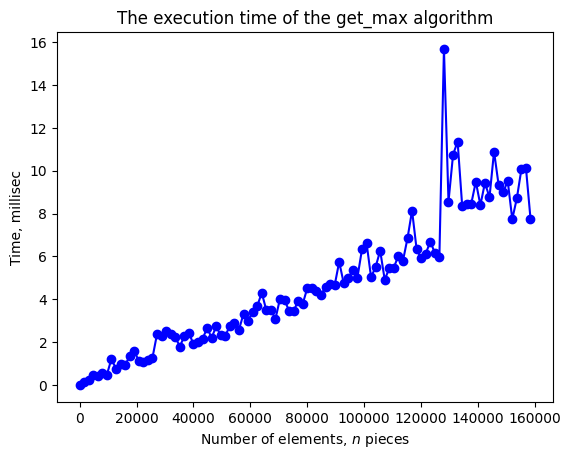

In [13]:
items = []
times = []
for arr in arrs:
    func = get_usage_time(number=10, ndigits=5)(get_max)
    items.append(len(arr))
    times.append(func(arr))
create_plot(items, times, f'{func}')

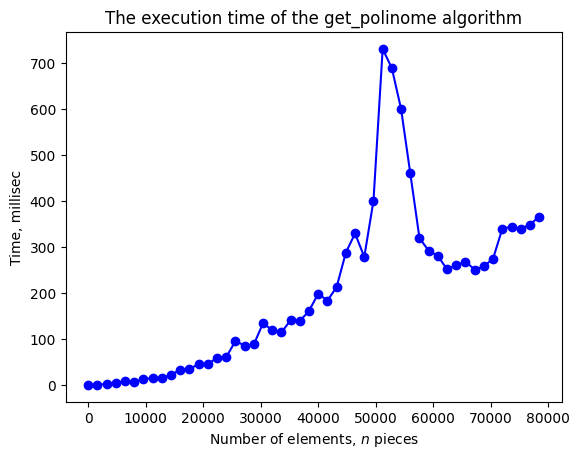

In [14]:
items = []
times = []
for arr in arrs[:len(arrs) // 2]:  # requires too much time
    func = get_usage_time(number=5, ndigits=5)(get_polinome)
    items.append(len(arr))
    times.append(func(arr, 2))
create_plot(items, times, f'{func}')

# Задание 2 

In [15]:
def get_random_matrix(n):
    matrix = [[random.randint(0, 1000) for _ in range(n)] for _ in range(n)]
    return matrix

In [16]:
def multiply_matrix(matrix_1, matrix_2):
    n = len(matrix_1)
    res = [[0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(n):
            for k in range(n):
                res[i][j] = matrix_1[i][k] * matrix_2[k][j]
                
    return res

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


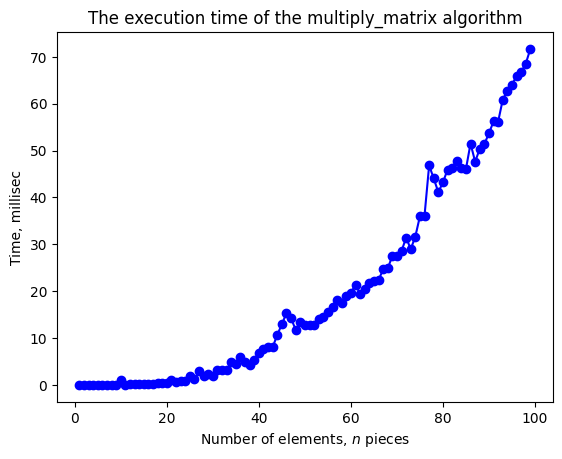

In [17]:
items = []
times = []

for n in range(1, 10**2, 1):
        func = get_usage_time(number=5, ndigits=5)(multiply_matrix)
        print(n)
        items.append(n)
        times.append(func(get_random_matrix(n), get_random_matrix(n)))

create_plot(items, times, f'{func}')